# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第10课：官方示例讲解-关节点和桥

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

### 定义：如果一个顶点的移除增加了图中连接组件的数量，那么它就是一个连接点（或关节点）。
### 如果边的移除增加了图中(弱)连接分量的数量，那么边就是桥。

In [2]:
import igraph as ig
import matplotlib.pyplot as plt

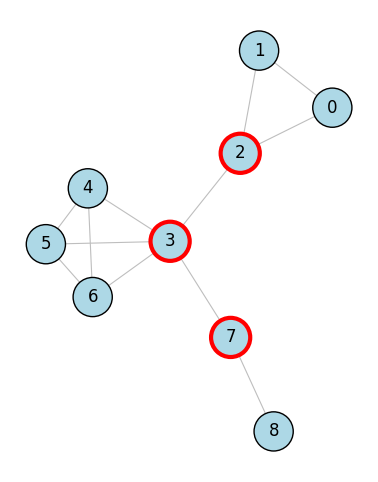

In [3]:
# 创建一个图：图公式是图的简单字符串表示形式。它非常方便地快速创建小图形。
g = ig.Graph.Formula(
    "0-1-2-0, 3:4:5:6 - 3:4:5:6, 2-3-7-8",
    simplify=True
)
# 3:4:5:6 - 3:4:5:6表示这四个节点任意一对节点之间都存在边，当simplify=True时，不含自环，否则含有自环。

# 找出所有的关节点
articulation_points = g.vs[g.articulation_points()]


fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.3,
    vertex_color="lightblue",
    vertex_label=range(g.vcount()),
    vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    vertex_frame_width = [3 if v in articulation_points else 1 for v in g.vs],
    edge_width=0.8,
    edge_color='gray',
)
plt.show()

In [4]:
g = ig.Graph(14, [(0, 1), (1, 2), (2, 3), (0, 3), (0, 2), (1, 3), (3, 4),
        (4, 5), (5, 6), (6, 4), (6, 7), (7, 8), (7, 9), (9, 10), (10 ,11),
        (11 ,7), (7, 10), (8, 9), (8, 10), (5, 12), (12, 13)])

# 找出所有的桥
edges = g.get_edgelist()
bridges = g.bridges()
# print(bridges)
for index in bridges:
    print(edges[index])

(3, 4)
(6, 7)
(5, 12)
(12, 13)


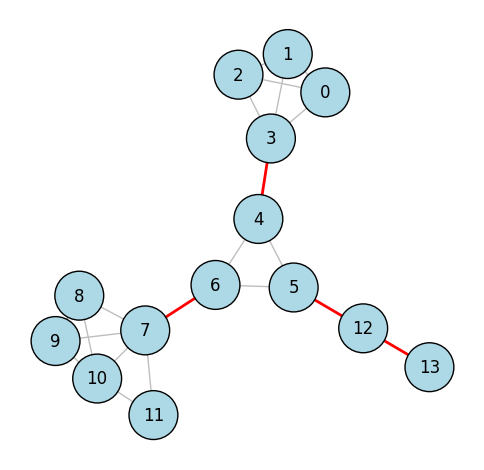

In [5]:
g.es["color"] = "gray"
g.es[bridges]["color"] = "red"
g.es["width"] = 1.0
g.es[bridges]["width"] = 2.0

fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_color="lightblue",
    vertex_label=range(g.vcount())
)
plt.show()

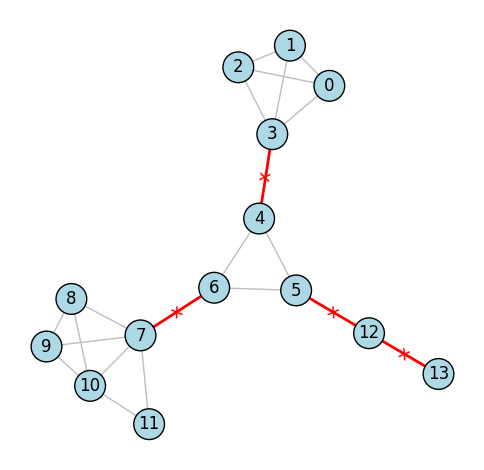

In [6]:
g.es["label"] = ""
g.es[bridges]["label"] = "x"
fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.3,
    vertex_color="lightblue",
    vertex_label=range(g.vcount()),
    edge_background="#FFF0",    # transparent background color
    edge_align_label=True,      # 确保标签与边对齐
    edge_label=g.es["label"],
    edge_label_color="red"
)
plt.show()